In [11]:
from drowsiness_detection.data import load_engineered_60_sec_data
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from drowsiness_detection import config
from joblib import dump
import time

In [25]:
data = load_engineered_60_sec_data()

X_train = np.concatenate([data.X_train, data.X_val])
y_train = np.concatenate([data.y_train, data.y_val])
X_test = data.X_test
y_test = data.y_test

del data
print("Hi")

In [13]:
best_params=  {
    "class_weight": "balanced",
    "criterion": "entropy",
    "max_depth": 3,
    "max_features": "sqrt",
    "min_samples_split": 0.02671651604985316,
    "n_estimators": 512
  }

model = RandomForestClassifier(**best_params, verbose=1, n_jobs=-2)


In [22]:
model.fit(X=X_train, y=y_train)

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-2)]: Done 512 out of 512 | elapsed:   25.6s finished


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features='sqrt',
                       min_samples_split=0.02671651604985316, n_estimators=512,
                       n_jobs=-2, verbose=1)

In [23]:
dump(model, str(config.MODEL_DIR_PATH.joinpath(f"random_forest_{time.strftime('%Y%m%d-%H%M%S')}.joblib")))

['/home/tim/IM/data/models/60sec/random_forest_20220806-180447.joblib']

In [26]:
y_pred_test = model.predict_proba(X_test)[:,1]
y_pred_train = model.predict_proba(X_train)[:,1]

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 512 out of 512 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.4s
[Parallel(n_jobs=7)]: Done 512 out of 512 | elapsed:    0.4s finished


In [28]:
print(np.mean((y_pred_test > .5) == y_test))

0.695518250423533


In [29]:
np.save(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_pred_test_{time.strftime('%Y%m%d-%H%M%S')}.npy")), y_pred_test)
np.save(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_pred_train_{time.strftime('%Y%m%d-%H%M%S')}.npy")), y_pred_train)

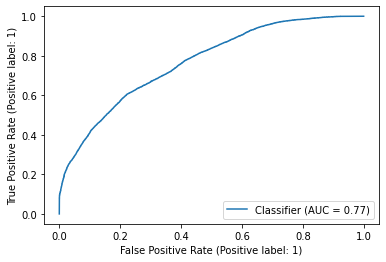

In [30]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_train, y_pred_train, pos_label=1)


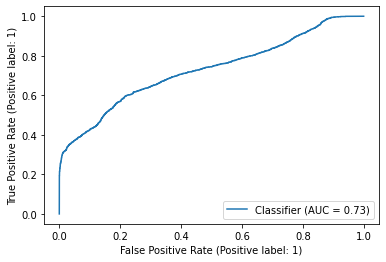

In [31]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_test, pos_label=1)


In [33]:
np.save(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_true_test.npy")), y_test)
np.save(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_true_train.npy")), y_train)